In [50]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [38]:
file = 'Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(file)
df.drop(columns='Employee_ID',inplace=True)
new_col = ('Age','Gender','Job_role','Industry',
              'Experience','Modality','Hours/Week','Meetings',
              'Balance_rating','Stress','MentalH_condition','Access_mentalh',
              'Productivity_change','Social_isolation','Satisfaction_remote',
              'Support_remote','Physical_activity','Sleep_quality','Region') 
rename_col = dict(zip(df.columns,new_col))
df.rename(columns=rename_col,inplace=True)

In [39]:
df.head()

,Age,Gender,Job_role,Industry,Experience,Modality,Hours/Week,Meetings,Balance_rating,Stress,MentalH_condition,Access_mentalh,Productivity_change,Social_isolation,Satisfaction_remote,Support_remote,Physical_activity,Sleep_quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  5000 non-null   int64 
 1   Gender               5000 non-null   object
 2   Job_role             5000 non-null   object
 3   Industry             5000 non-null   object
 4   Experience           5000 non-null   int64 
 5   Modality             5000 non-null   object
 6   Hours/Week           5000 non-null   int64 
 7   Meetings             5000 non-null   int64 
 8   Balance_rating       5000 non-null   int64 
 9   Stress               5000 non-null   object
 10  MentalH_condition    5000 non-null   object
 11  Access_mentalh       5000 non-null   object
 12  Productivity_change  5000 non-null   object
 13  Social_isolation     5000 non-null   int64 
 14  Satisfaction_remote  5000 non-null   object
 15  Support_remote       5000 non-null   int64 
 16  Physic

In [49]:
df_cat = df.select_dtypes(include='object')

In [42]:
df_cat.describe()

,Gender,Job_role,Industry,Modality,Stress,MentalH_condition,Access_mentalh,Productivity_change,Satisfaction_remote,Physical_activity,Sleep_quality,Region
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,4,7,7,3,3,4,2,3,3,3,3,6
top,Female,Project Manager,Finance,Remote,High,Burnout,No,Decrease,Unsatisfied,Weekly,Good,Oceania
freq,1274,738,747,1714,1686,1280,2553,1737,1677,1755,1687,867


In [43]:
#função para achar colunas com valores definidos por 'None'.
def get_coluna_com_none(df):
    lista_com_colunas_none = []
    for coluna in df.columns:
        df_val = df[f'{coluna}'].value_counts()
        if ('None' in df_val.index):
            lista_com_colunas_none.append(coluna)
    return(lista_com_colunas_none)

In [44]:
coluna_none = get_coluna_com_none(df)

,MentalH_condition,Physical_activity
0,Burnout,Weekly


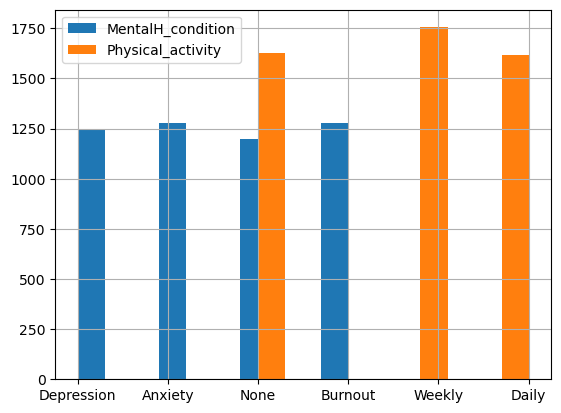

In [45]:
#plotar 
for coluna in coluna_none:
    df[coluna].hist(legend=coluna)
df[coluna_none].mode()

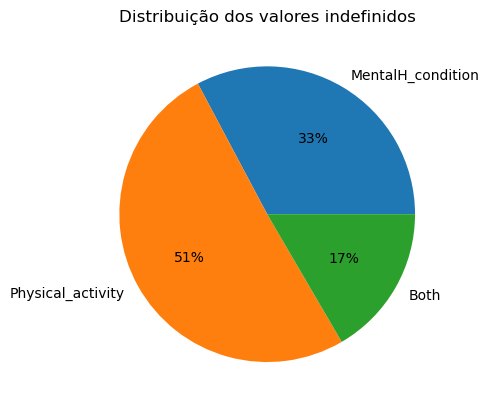

In [46]:
x= df.loc[df['MentalH_condition'] == 'None'].index
y= df.loc[df['Physical_activity'] == 'None'].index
list_none= []  
for p in x:
    if p in y:
        list_none.append(p)
        
x_count= df['MentalH_condition'].value_counts()
y_count= df['Physical_activity'].value_counts()

x_count_none = x_count['None']-len(list_none)
y_count_none = y_count['None']-len(list_none)
total_none = x_count_none+y_count_none
both_none = len(list_none)
    
plt.pie(x=[x_count_none,y_count_none,both_none],
        labels=['MentalH_condition','Physical_activity','Both'],
        autopct='%1.0f%%')
plt.title('Distribuição dos valores indefinidos')
plt.show()

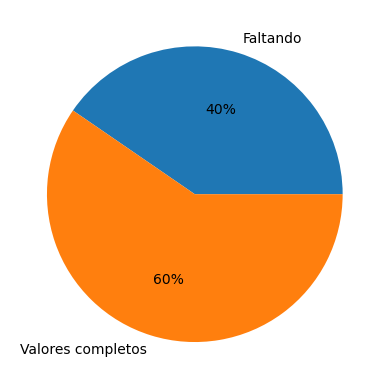

In [47]:
percent_none_total = round(((total_none)/len(df))*100)
plt.pie(x=[(total_none),(len(df)-total_none)],
        labels=['Faltando','Valores completos'],
        autopct='%1.0f%%')
plt.show()

,Age,Gender,Job_role,Industry,Experience,Modality,Hours/Week,Meetings,Balance_rating,Stress,MentalH_condition,Access_mentalh,Productivity_change,Social_isolation,Satisfaction_remote,Support_remote,Physical_activity,Sleep_quality,Region
0,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,None,Average,Africa
4997,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,None,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
